In [1]:
#необходимо для метрики R2Score из keras
#!pip install tf-nightly
#не устанавилось

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Input, Dense, BatchNormalization
from tensorflow.keras.metrics import mean_absolute_error, mean_squared_error
#from tensorflow.keras.metrics import R2Score
import pickle
%matplotlib inline

In [3]:
df_bp = pd.read_excel('X_bp.xlsx')
df_bp

,Unnamed: 0,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2"
0,0.0,1.857143,2030.000000,738.736842,30.000000,22.267857,100.000000,210.000000,70.000000,3000.000000,220.000000
1,1.0,1.857143,2030.000000,738.736842,50.000000,23.750000,284.615385,210.000000,70.000000,3000.000000,220.000000
2,2.0,1.857143,2030.000000,738.736842,49.900000,33.000000,284.615385,210.000000,70.000000,3000.000000,220.000000
3,3.0,1.857143,2030.000000,738.736842,129.000000,21.250000,300.000000,210.000000,70.000000,3000.000000,220.000000
4,4.0,2.771331,2030.000000,753.000000,111.860000,22.267857,284.615385,210.000000,70.000000,3000.000000,220.000000
...,...,...,...,...,...,...,...,...,...,...,...
1018,1018.0,2.271346,1952.087902,912.855545,86.992183,20.123249,324.774576,209.198700,73.090961,2387.292495,125.007669
1019,1019.0,3.444022,2050.089171,444.732634,145.981978,19.599769,254.215401,350.660830,72.920827,2360.392784,117.730099
1020,1020.0,3.280604,1972.372865,416.836524,110.533477,23.957502,248.423047,740.142791,74.734344,2662.906040,236.606764
1021,1021.0,3.705351,2066.799773,741.475517,141.397963,19.246945,275.779840,641.468152,74.042708,2071.715856,197.126067


In [4]:
df_nup = pd.read_excel('X_nup.xlsx')
df_nup

,Unnamed: 0,"Угол нашивки, град",Шаг нашивки,Плотность нашивки
0,0.0,0.0,4.000000,57.000000
1,1.0,0.0,4.000000,60.000000
2,2.0,0.0,4.000000,70.000000
3,3.0,0.0,5.000000,47.000000
4,4.0,0.0,5.000000,57.000000
...,...,...,...,...
1035,1035.0,90.0,8.088111,47.759177
1036,1036.0,90.0,7.619138,66.931932
1037,1037.0,90.0,9.800926,72.858286
1038,1038.0,90.0,10.079859,65.519479


In [5]:
df_bp = df_bp.iloc[:, 1:]
df_nup = df_nup.iloc[:, 1:]
df = pd.concat([df_bp, df_nup], axis=1, join='inner')
df

,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2","Угол нашивки, град",Шаг нашивки,Плотность нашивки
0,1.857143,2030.000000,738.736842,30.000000,22.267857,100.000000,210.000000,70.000000,3000.000000,220.000000,0.0,4.000000,57.000000
1,1.857143,2030.000000,738.736842,50.000000,23.750000,284.615385,210.000000,70.000000,3000.000000,220.000000,0.0,4.000000,60.000000
2,1.857143,2030.000000,738.736842,49.900000,33.000000,284.615385,210.000000,70.000000,3000.000000,220.000000,0.0,4.000000,70.000000
3,1.857143,2030.000000,738.736842,129.000000,21.250000,300.000000,210.000000,70.000000,3000.000000,220.000000,0.0,5.000000,47.000000
4,2.771331,2030.000000,753.000000,111.860000,22.267857,284.615385,210.000000,70.000000,3000.000000,220.000000,0.0,5.000000,57.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1018,2.271346,1952.087902,912.855545,86.992183,20.123249,324.774576,209.198700,73.090961,2387.292495,125.007669,90.0,9.076380,47.019770
1019,3.444022,2050.089171,444.732634,145.981978,19.599769,254.215401,350.660830,72.920827,2360.392784,117.730099,90.0,10.565614,53.750790
1020,3.280604,1972.372865,416.836524,110.533477,23.957502,248.423047,740.142791,74.734344,2662.906040,236.606764,90.0,4.161154,67.629684
1021,3.705351,2066.799773,741.475517,141.397963,19.246945,275.779840,641.468152,74.042708,2071.715856,197.126067,90.0,6.313201,58.261074


In [6]:
#удаление выбросов с помощью 3 сигм
df_z = df[(np.abs(stats.zscore(df)) < 3).all(axis=1)]
df_z

,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2","Угол нашивки, град",Шаг нашивки,Плотность нашивки
1,1.857143,2030.000000,738.736842,50.000000,23.750000,284.615385,210.000000,70.000000,3000.000000,220.000000,0.0,4.000000,60.000000
3,1.857143,2030.000000,738.736842,129.000000,21.250000,300.000000,210.000000,70.000000,3000.000000,220.000000,0.0,5.000000,47.000000
4,2.771331,2030.000000,753.000000,111.860000,22.267857,284.615385,210.000000,70.000000,3000.000000,220.000000,0.0,5.000000,57.000000
5,2.767918,2000.000000,748.000000,111.860000,22.267857,284.615385,210.000000,70.000000,3000.000000,220.000000,0.0,5.000000,60.000000
6,2.569620,1910.000000,807.000000,111.860000,22.267857,284.615385,210.000000,70.000000,3000.000000,220.000000,0.0,5.000000,70.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1018,2.271346,1952.087902,912.855545,86.992183,20.123249,324.774576,209.198700,73.090961,2387.292495,125.007669,90.0,9.076380,47.019770
1019,3.444022,2050.089171,444.732634,145.981978,19.599769,254.215401,350.660830,72.920827,2360.392784,117.730099,90.0,10.565614,53.750790
1020,3.280604,1972.372865,416.836524,110.533477,23.957502,248.423047,740.142791,74.734344,2662.906040,236.606764,90.0,4.161154,67.629684
1021,3.705351,2066.799773,741.475517,141.397963,19.246945,275.779840,641.468152,74.042708,2071.715856,197.126067,90.0,6.313201,58.261074


In [7]:
ss = StandardScaler()              
ss = ss.fit_transform(df_z)
#в результате получается numpy массив, который преобразуем в DataFrame
df_ss = pd.DataFrame(data=ss, columns=df_z.columns)
df_ss.describe()

,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2","Угол нашивки, град",Шаг нашивки,Плотность нашивки
count,9.990000e+02,9.990000e+02,9.990000e+02,9.990000e+02,9.990000e+02,9.990000e+02,9.990000e+02,9.990000e+02,9.990000e+02,9.990000e+02,9.990000e+02,9.990000e+02,9.990000e+02
mean,1.505858e-16,-3.097733e-15,6.756913e-17,-1.092442e-16,-2.911696e-16,-1.969840e-16,1.549200e-16,2.858797e-15,5.794497e-16,9.251859e-17,2.283125e-15,5.606682e-17,-7.245900e-17
std,1.000501e+00,1.000501e+00,1.000501e+00,1.000501e+00,1.000501e+00,1.000501e+00,1.000501e+00,1.000501e+00,1.000501e+00,1.000501e+00,1.000501e+00,1.000501e+00,1.000501e+00
min,-2.804633e+00,-2.618774e+00,-2.247590e+00,-2.908544e+00,-2.742801e+00,-2.795859e+00,-1.725710e+00,-2.985712e+00,-2.953238e+00,-3.007020e+00,-9.930174e-01,-2.687171e+00,-3.099817e+00
25%,-6.781908e-01,-7.097124e-01,-7.280190e-01,-6.576547e-01,-6.925708e-01,-6.685947e-01,-7.664917e-01,-6.658067e-01,-6.832385e-01,-6.522420e-01,-9.930174e-01,-7.086606e-01,-6.195198e-01
50%,-3.114775e-02,2.571301e-02,7.899558e-03,-6.624289e-03,-5.819450e-03,-1.686254e-03,-1.048987e-01,-2.887993e-02,-1.965750e-02,4.413767e-03,-9.930174e-01,6.847284e-03,1.824727e-02
75%,6.801307e-01,6.267731e-01,6.748517e-01,6.833178e-01,7.311338e-01,6.728703e-01,7.612871e-01,6.495422e-01,6.089493e-01,6.644458e-01,1.007032e+00,6.570172e-01,6.468672e-01
max,2.922296e+00,2.979312e+00,2.781848e+00,2.946635e+00,2.819592e+00,2.925323e+00,2.925070e+00,2.973525e+00,2.857099e+00,2.863982e+00,1.007032e+00,2.943918e+00,3.012626e+00


In [8]:
X = df_ss.drop('Соотношение матрица-наполнитель', axis=1)
y = df_ss['Соотношение матрица-наполнитель']
X_tr, X_test, y_tr, y_test = train_test_split(X, y, test_size=0.15, random_state=1)

In [9]:
X_train, X_val, y_train, y_val = train_test_split(X_tr, y_tr, test_size=0.15, random_state=1)

In [10]:
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=1)

In [11]:
print(df_z.shape)
print(X_tr.shape)
print(X_train.shape)
print(X_val.shape)
print(X_test.shape)
print(y_tr.shape)
print(y_train.shape)
print(y_val.shape)
print(y_test.shape)

(999, 13)
(849, 12)
(721, 12)
(128, 12)
(150, 12)
(849,)
(721,)
(128,)
(150,)


In [12]:
X_train.shape[1]

12

Создадим 1-ю нейронную сеть.

In [13]:
model1 = Sequential()
#model1.add(Input(shape=X_train.shape[1]))
model1.add(Dense(128, activation='sigmoid', input_shape=[X_train.shape[1]]))
model1.add(Dense(128, activation='sigmoid'))
model1.add(Dense(1, activation='relu'))
#выведем полученную модель на экран
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               1664      
                                                                 
 dense_1 (Dense)             (None, 128)               16512     
                                                                 
 dense_2 (Dense)             (None, 1)                 129       
                                                                 
Total params: 18,305
Trainable params: 18,305
Non-trainable params: 0
_________________________________________________________________


In [14]:
model1.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_squared_error'])

In [15]:
#функция ранней остановки, patience=5 - если в течение 5-ти эпох потери на валидации (val_loss) не будут уменьшаться
stop1 = tf.keras.callbacks.EarlyStopping(monitor='val_loss', verbose=1, patience=5)

In [16]:
history1_train = model1.fit(X_train, y_train,
                            batch_size=32,
                            epochs=15,
                            verbose=1,
                            callbacks=[stop1],
                            validation_data=(X_val, y_val))

Epoch 1/15
23/23 [==============================] - 1s 16ms/step - loss: 0.7975 - mean_squared_error: 1.0084 - val_loss: 0.7495 - val_mean_squared_error: 0.8932
Epoch 2/15
23/23 [==============================] - 0s 5ms/step - loss: 0.7975 - mean_squared_error: 1.0084 - val_loss: 0.7495 - val_mean_squared_error: 0.8932
Epoch 3/15
23/23 [==============================] - 0s 5ms/step - loss: 0.7975 - mean_squared_error: 1.0084 - val_loss: 0.7495 - val_mean_squared_error: 0.8932
Epoch 4/15
23/23 [==============================] - 0s 5ms/step - loss: 0.7975 - mean_squared_error: 1.0084 - val_loss: 0.7495 - val_mean_squared_error: 0.8932
Epoch 5/15
23/23 [==============================] - 0s 5ms/step - loss: 0.7975 - mean_squared_error: 1.0084 - val_loss: 0.7495 - val_mean_squared_error: 0.8932
Epoch 6/15
23/23 [==============================] - 0s 5ms/step - loss: 0.7975 - mean_squared_error: 1.0084 - val_loss: 0.7495 - val_mean_squared_error: 0.8932
Epoch 6: early stopping


In [17]:
#качество модели на тестовой выборке
history1_test = model1.evaluate(X_test, y_test)

5/5 [==============================] - 0s 3ms/step - loss: 0.8480 - mean_squared_error: 1.0509


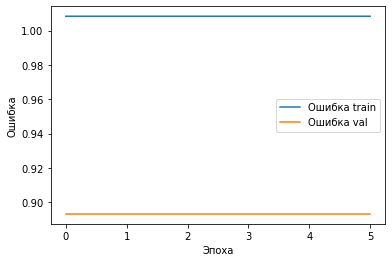

In [18]:
plt.plot(history1_train.history['mean_squared_error'], label='Ошибка train')
plt.plot(history1_train.history['val_mean_squared_error'], label='Ошибка val')
plt.xlabel('Эпоха')
plt.ylabel('Ошибка')
plt.legend()
plt.show()

In [19]:
#предсказываем результат для тестовой выборки
y_pred1 = model1.predict(X_test)

5/5 [==============================] - 0s 2ms/step


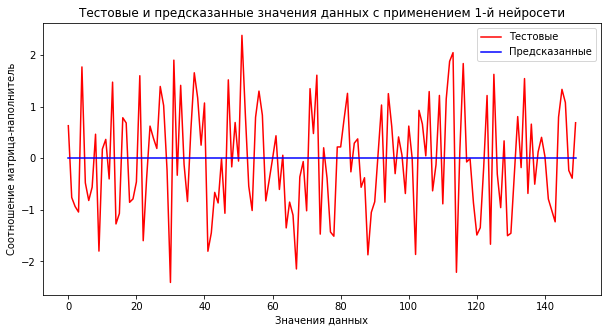

In [20]:
plt.figure(figsize=(10, 5))
plt.title('Тестовые и предсказанные значения данных с применением 1-й нейросети')
plt.plot(y_test.values, label='Тестовые', color='red')
plt.plot(y_pred1, label='Предсказанные', color='blue')
plt.xlabel('Значения данных')
plt.ylabel('Соотношение матрица-наполнитель')
plt.legend()
plt.show()

Создадим 2-ю нейронную сеть.

In [21]:
model2 = Sequential()
model2.add(Input(shape=X_train.shape[1]))
model2.add(Dense(8, activation='sigmoid'))
model2.add(Dense(8, activation='sigmoid'))
model2.add(Dense(1, activation='linear'))
#выведем полученную модель на экран
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 8)                 104       
                                                                 
 dense_4 (Dense)             (None, 8)                 72        
                                                                 
 dense_5 (Dense)             (None, 1)                 9         
                                                                 
Total params: 185
Trainable params: 185
Non-trainable params: 0
_________________________________________________________________


In [22]:
model2.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_squared_error'])

In [23]:
#функция ранней остановки, patience=5 - если в течение 5-ти эпох потери на валидации (val_loss) не будут уменьшаться
stop2 = tf.keras.callbacks.EarlyStopping(monitor='val_loss', verbose=1, patience=5)

In [24]:
history2_train = model2.fit(X_train, y_train,
                            batch_size=25,
                            epochs=10,
                            verbose=1,
                            callbacks=[stop2],
                            validation_data=(X_val, y_val))

Epoch 1/10
29/29 [==============================] - 1s 11ms/step - loss: 0.9279 - mean_squared_error: 1.3498 - val_loss: 0.8279 - val_mean_squared_error: 1.0988
Epoch 2/10
29/29 [==============================] - 0s 4ms/step - loss: 0.8441 - mean_squared_error: 1.1341 - val_loss: 0.7768 - val_mean_squared_error: 0.9668
Epoch 3/10
29/29 [==============================] - 0s 4ms/step - loss: 0.8100 - mean_squared_error: 1.0447 - val_loss: 0.7571 - val_mean_squared_error: 0.9255
Epoch 4/10
29/29 [==============================] - 0s 4ms/step - loss: 0.7993 - mean_squared_error: 1.0205 - val_loss: 0.7528 - val_mean_squared_error: 0.9162
Epoch 5/10
29/29 [==============================] - 0s 4ms/step - loss: 0.7983 - mean_squared_error: 1.0129 - val_loss: 0.7527 - val_mean_squared_error: 0.9127
Epoch 6/10
29/29 [==============================] - 0s 4ms/step - loss: 0.7966 - mean_squared_error: 1.0089 - val_loss: 0.7530 - val_mean_squared_error: 0.9131
Epoch 7/10
29/29 [=====================

In [25]:
#качество модели на тестовой выборке
history2_test = model2.evaluate(X_test, y_test)

5/5 [==============================] - 0s 3ms/step - loss: 0.8608 - mean_squared_error: 1.0680


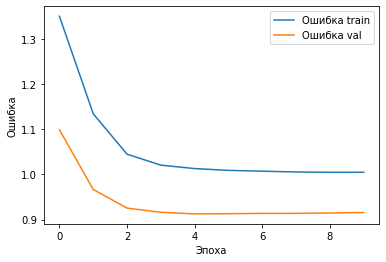

In [26]:
plt.plot(history2_train.history['mean_squared_error'], label='Ошибка train')
plt.plot(history2_train.history['val_mean_squared_error'], label='Ошибка val')
plt.xlabel('Эпоха')
plt.ylabel('Ошибка')
plt.legend()
plt.show()

In [27]:
#предсказываем результат для тестовой выборки
y_pred2 = model2.predict(X_test)

5/5 [==============================] - 0s 2ms/step


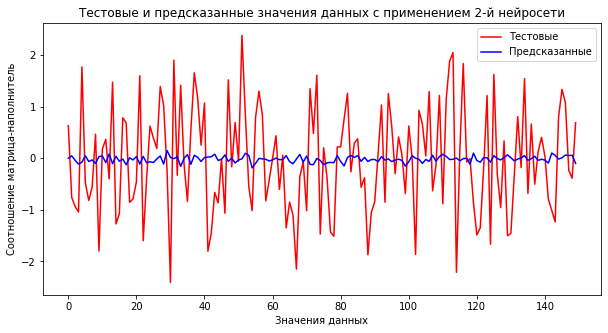

In [28]:
plt.figure(figsize=(10, 5))
plt.title('Тестовые и предсказанные значения данных с применением 2-й нейросети')
plt.plot(y_test.values, label='Тестовые', color='red')
plt.plot(y_pred2, label='Предсказанные', color='blue')
plt.xlabel('Значения данных')
plt.ylabel('Соотношение матрица-наполнитель')
plt.legend()
plt.show()

Создадим 3-ю нейронную сеть.

In [29]:
model3 = Sequential()
model3.add(Input(shape=X_train.shape[1]))
model3.add(Dense(128, activation='softmax', use_bias=True)) #добавим смещение, чтобы модель стала более гибкой
model3.add(Dense(64, activation='softmax', use_bias=True))
model3.add(Dense(32, activation='softmax', use_bias=True))
model3.add(Dense(1, activation='sigmoid', use_bias=True))
#выведем полученную модель на экран
model3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 128)               1664      
                                                                 
 dense_7 (Dense)             (None, 64)                8256      
                                                                 
 dense_8 (Dense)             (None, 32)                2080      
                                                                 
 dense_9 (Dense)             (None, 1)                 33        
                                                                 
Total params: 12,033
Trainable params: 12,033
Non-trainable params: 0
_________________________________________________________________


In [30]:
model3.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_squared_error'])

In [31]:
#функция ранней остановки, patience=5 - если в течение 5-ти эпох потери на валидации (val_loss) не будут уменьшаться
stop3 = tf.keras.callbacks.EarlyStopping(monitor='val_loss', verbose=1, patience=5)

In [32]:
history3_train = model3.fit(X_train, y_train,
                            batch_size=32,
                            epochs=15,
                            verbose=1,
                            callbacks=[stop3],
                            validation_data=(X_val, y_val))

Epoch 1/15
23/23 [==============================] - 2s 14ms/step - loss: 0.9004 - mean_squared_error: 1.2434 - val_loss: 0.8799 - val_mean_squared_error: 1.1315
Epoch 2/15
23/23 [==============================] - 0s 5ms/step - loss: 0.8957 - mean_squared_error: 1.2312 - val_loss: 0.8749 - val_mean_squared_error: 1.1192
Epoch 3/15
23/23 [==============================] - 0s 5ms/step - loss: 0.8909 - mean_squared_error: 1.2195 - val_loss: 0.8703 - val_mean_squared_error: 1.1079
Epoch 4/15
23/23 [==============================] - 0s 5ms/step - loss: 0.8865 - mean_squared_error: 1.2084 - val_loss: 0.8660 - val_mean_squared_error: 1.0969
Epoch 5/15
23/23 [==============================] - 0s 5ms/step - loss: 0.8824 - mean_squared_error: 1.1982 - val_loss: 0.8619 - val_mean_squared_error: 1.0864
Epoch 6/15
23/23 [==============================] - 0s 5ms/step - loss: 0.8783 - mean_squared_error: 1.1877 - val_loss: 0.8579 - val_mean_squared_error: 1.0763
Epoch 7/15
23/23 [=====================

In [33]:
#качество модели на тестовой выборке
history3_test = model3.evaluate(X_test, y_test)

5/5 [==============================] - 0s 3ms/step - loss: 0.9054 - mean_squared_error: 1.1866


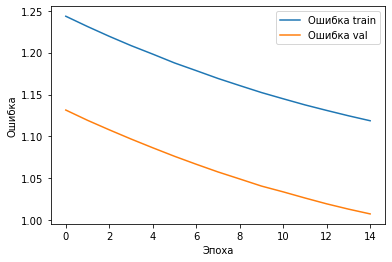

In [34]:
plt.plot(history3_train.history['mean_squared_error'], label='Ошибка train')
plt.plot(history3_train.history['val_mean_squared_error'], label='Ошибка val')
plt.xlabel('Эпоха')
plt.ylabel('Ошибка')
plt.legend()
plt.show()

In [35]:
#предсказываем результат для тестовой выборки
y_pred3 = model3.predict(X_test)

5/5 [==============================] - 0s 3ms/step


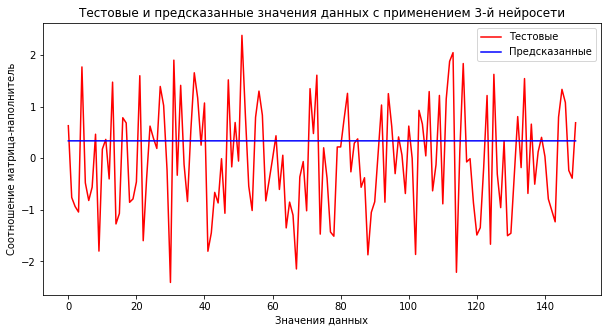

In [36]:
plt.figure(figsize=(10, 5))
plt.title('Тестовые и предсказанные значения данных с применением 3-й нейросети')
plt.plot(y_test.values, label='Тестовые', color='red')
plt.plot(y_pred3, label='Предсказанные', color='blue')
plt.xlabel('Значения данных')
plt.ylabel('Соотношение матрица-наполнитель')
plt.legend()
plt.show()

Создадим 4-ю нейронную сеть.

In [37]:
model4 = Sequential()
model4.add(Input(shape=X_train.shape[1]))
model4.add(Dense(1028, activation='sigmoid'))
model4.add(Dense(512, activation='sigmoid'))
model4.add(Dense(256, activation='sigmoid'))
model4.add(Dense(128, activation='sigmoid'))
model4.add(Dense(64, activation='sigmoid'))
model4.add(Dense(1, activation='relu'))
#выведем полученную модель на экран
model4.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 1028)              13364     
                                                                 
 dense_11 (Dense)            (None, 512)               526848    
                                                                 
 dense_12 (Dense)            (None, 256)               131328    
                                                                 
 dense_13 (Dense)            (None, 128)               32896     
                                                                 
 dense_14 (Dense)            (None, 64)                8256      
                                                                 
 dense_15 (Dense)            (None, 1)                 65        
                                                                 
Total params: 712,757
Trainable params: 712,757
Non-tr

In [38]:
model4.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_squared_error'])

In [39]:
#функция ранней остановки, patience=5 - если в течение 5-ти эпох потери на валидации (val_loss) не будут уменьшаться
stop4 = tf.keras.callbacks.EarlyStopping(monitor='val_loss', verbose=1, patience=5)

In [40]:
history4_train = model4.fit(X_train, y_train,
                            batch_size=32,
                            epochs=20,
                            verbose=1,
                            callbacks=[stop4],
                            validation_data=(X_val, y_val))

Epoch 1/20
23/23 [==============================] - 3s 28ms/step - loss: 0.7975 - mean_squared_error: 1.0084 - val_loss: 0.7495 - val_mean_squared_error: 0.8932
Epoch 2/20
23/23 [==============================] - 0s 19ms/step - loss: 0.7975 - mean_squared_error: 1.0084 - val_loss: 0.7495 - val_mean_squared_error: 0.8932
Epoch 3/20
23/23 [==============================] - 0s 19ms/step - loss: 0.7975 - mean_squared_error: 1.0084 - val_loss: 0.7495 - val_mean_squared_error: 0.8932
Epoch 4/20
23/23 [==============================] - 0s 18ms/step - loss: 0.7975 - mean_squared_error: 1.0084 - val_loss: 0.7495 - val_mean_squared_error: 0.8932
Epoch 5/20
23/23 [==============================] - 0s 19ms/step - loss: 0.7975 - mean_squared_error: 1.0084 - val_loss: 0.7495 - val_mean_squared_error: 0.8932
Epoch 6/20
23/23 [==============================] - 0s 18ms/step - loss: 0.7975 - mean_squared_error: 1.0084 - val_loss: 0.7495 - val_mean_squared_error: 0.8932
Epoch 6: early stopping


In [41]:
#качество модели на тестовой выборке
history4_test = model4.evaluate(X_test, y_test)

5/5 [==============================] - 0s 6ms/step - loss: 0.8480 - mean_squared_error: 1.0509


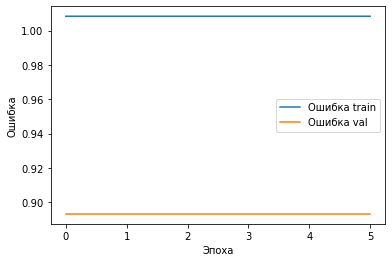

In [42]:
plt.plot(history4_train.history['mean_squared_error'], label='Ошибка train')
plt.plot(history4_train.history['val_mean_squared_error'], label='Ошибка val')
plt.xlabel('Эпоха')
plt.ylabel('Ошибка')
plt.legend()
plt.show()

In [43]:
#предсказываем результат для тестовой выборки
y_pred4 = model4.predict(X_test)

5/5 [==============================] - 0s 4ms/step


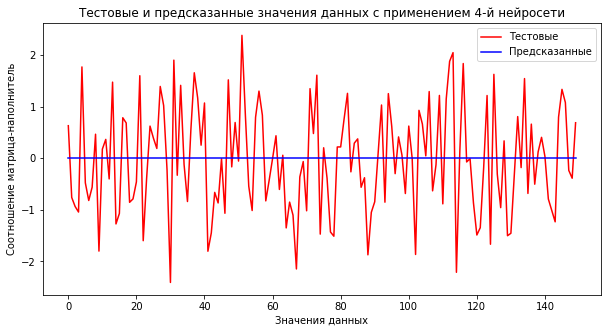

In [44]:
plt.figure(figsize=(10, 5))
plt.title('Тестовые и предсказанные значения данных с применением 4-й нейросети')
plt.plot(y_test.values, label='Тестовые', color='red')
plt.plot(y_pred4, label='Предсказанные', color='blue')
plt.xlabel('Значения данных')
plt.ylabel('Соотношение матрица-наполнитель')
plt.legend()
plt.show()

Создадим 5-ю нейронную сеть.

In [45]:
model5 = Sequential()
model5.add(Input(shape=X_train.shape[1]))
model5.add(Dense(2048, activation='tanh'))
model5.add(Dense(256, activation='tanh'))
model5.add(Dense(64, activation='tanh'))
model5.add(Dense(1, activation='linear'))
#выведем полученную модель на экран
model5.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_16 (Dense)            (None, 2048)              26624     
                                                                 
 dense_17 (Dense)            (None, 256)               524544    
                                                                 
 dense_18 (Dense)            (None, 64)                16448     
                                                                 
 dense_19 (Dense)            (None, 1)                 65        
                                                                 
Total params: 567,681
Trainable params: 567,681
Non-trainable params: 0
_________________________________________________________________


In [46]:
model5.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_squared_error'])

In [47]:
#функция ранней остановки, patience=5 - если в течение 5-ти эпох потери на валидации (val_loss) не будут уменьшаться
stop5 = tf.keras.callbacks.EarlyStopping(monitor='val_loss', verbose=1, patience=5)

In [48]:
history5_train = model5.fit(X_train, y_train,
                            batch_size=70,
                            epochs=20,
                            verbose=1,
                            callbacks=[stop5],
                            validation_data=(X_val, y_val))

Epoch 1/20
11/11 [==============================] - 2s 41ms/step - loss: 1.0296 - mean_squared_error: 1.7408 - val_loss: 0.7796 - val_mean_squared_error: 0.9714
Epoch 2/20
11/11 [==============================] - 0s 23ms/step - loss: 0.8382 - mean_squared_error: 1.1193 - val_loss: 0.8745 - val_mean_squared_error: 1.1744
Epoch 3/20
11/11 [==============================] - 0s 22ms/step - loss: 0.7942 - mean_squared_error: 1.0104 - val_loss: 0.7993 - val_mean_squared_error: 1.0015
Epoch 4/20
11/11 [==============================] - 0s 23ms/step - loss: 0.7625 - mean_squared_error: 0.9339 - val_loss: 0.7978 - val_mean_squared_error: 1.0180
Epoch 5/20
11/11 [==============================] - 0s 22ms/step - loss: 0.7321 - mean_squared_error: 0.9056 - val_loss: 0.8467 - val_mean_squared_error: 1.1133
Epoch 6/20
11/11 [==============================] - 0s 22ms/step - loss: 0.7065 - mean_squared_error: 0.8600 - val_loss: 0.8613 - val_mean_squared_error: 1.1437
Epoch 6: early stopping


In [49]:
#качество модели на тестовой выборке
history5_test = model5.evaluate(X_test, y_test)

5/5 [==============================] - 0s 4ms/step - loss: 0.9199 - mean_squared_error: 1.2202


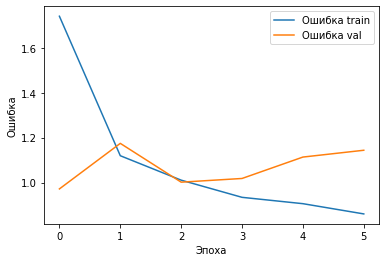

In [50]:
plt.plot(history5_train.history['mean_squared_error'], label='Ошибка train')
plt.plot(history5_train.history['val_mean_squared_error'], label='Ошибка val')
plt.xlabel('Эпоха')
plt.ylabel('Ошибка')
plt.legend()
plt.show()

In [51]:
#предсказываем результат для тестовой выборки
y_pred5 = model5.predict(X_test)

5/5 [==============================] - 0s 4ms/step


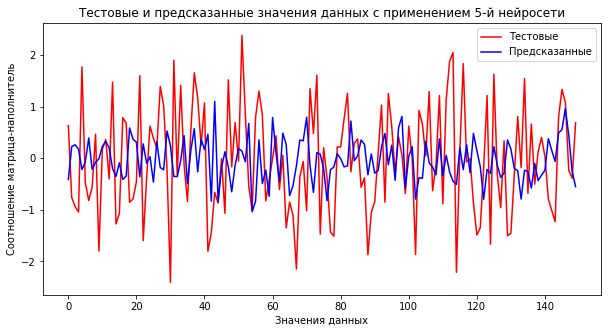

In [52]:
plt.figure(figsize=(10, 5))
plt.title('Тестовые и предсказанные значения данных с применением 5-й нейросети')
plt.plot(y_test.values, label='Тестовые', color='red')
plt.plot(y_pred5, label='Предсказанные', color='blue')
plt.xlabel('Значения данных')
plt.ylabel('Соотношение матрица-наполнитель')
plt.legend()
plt.show()

Создадим 6-ю нейронную сеть.

In [53]:
model6 = Sequential()
model6.add(Input(shape=X_train.shape[1]))
model6.add(Dense(512, activation='sigmoid'))
model6.add(Dense(64, activation='sigmoid'))
model6.add(Dense(8, activation='sigmoid'))
model6.add(Dense(1, activation='linear'))
#выведем полученную модель на экран
model6.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_20 (Dense)            (None, 512)               6656      
                                                                 
 dense_21 (Dense)            (None, 64)                32832     
                                                                 
 dense_22 (Dense)            (None, 8)                 520       
                                                                 
 dense_23 (Dense)            (None, 1)                 9         
                                                                 
Total params: 40,017
Trainable params: 40,017
Non-trainable params: 0
_________________________________________________________________


In [54]:
model6.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_squared_error'])

In [55]:
#функция ранней остановки, patience=5 - если в течение 5-ти эпох потери на валидации (val_loss) не будут уменьшаться
stop6 = tf.keras.callbacks.EarlyStopping(monitor='val_loss', verbose=1, patience=5)

In [56]:
history6_train = model6.fit(X_train, y_train,
                            batch_size=70,
                            epochs=20,
                            verbose=1,
                            callbacks=[stop6],
                            validation_data=(X_val, y_val))

Epoch 1/20
11/11 [==============================] - 2s 53ms/step - loss: 0.8109 - mean_squared_error: 1.0312 - val_loss: 0.7508 - val_mean_squared_error: 0.8962
Epoch 2/20
11/11 [==============================] - 0s 11ms/step - loss: 0.8026 - mean_squared_error: 1.0175 - val_loss: 0.7617 - val_mean_squared_error: 0.9036
Epoch 3/20
11/11 [==============================] - 0s 10ms/step - loss: 0.8049 - mean_squared_error: 1.0160 - val_loss: 0.7520 - val_mean_squared_error: 0.9013
Epoch 4/20
11/11 [==============================] - 0s 11ms/step - loss: 0.8011 - mean_squared_error: 1.0246 - val_loss: 0.7524 - val_mean_squared_error: 0.9003
Epoch 5/20
11/11 [==============================] - 0s 9ms/step - loss: 0.7962 - mean_squared_error: 1.0042 - val_loss: 0.7554 - val_mean_squared_error: 0.8997
Epoch 6/20
11/11 [==============================] - 0s 10ms/step - loss: 0.7960 - mean_squared_error: 1.0030 - val_loss: 0.7540 - val_mean_squared_error: 0.9055
Epoch 6: early stopping


In [57]:
#качество модели на тестовой выборке
history6_test = model6.evaluate(X_test, y_test)

5/5 [==============================] - 0s 3ms/step - loss: 0.8494 - mean_squared_error: 1.0528


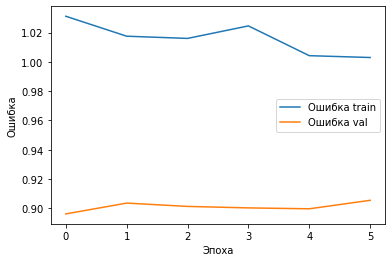

In [58]:
plt.plot(history6_train.history['mean_squared_error'], label='Ошибка train')
plt.plot(history6_train.history['val_mean_squared_error'], label='Ошибка val')
plt.xlabel('Эпоха')
plt.ylabel('Ошибка')
plt.legend()
plt.show()

In [59]:
#предсказываем результат для тестовой выборки
y_pred6 = model6.predict(X_test)

5/5 [==============================] - 0s 2ms/step


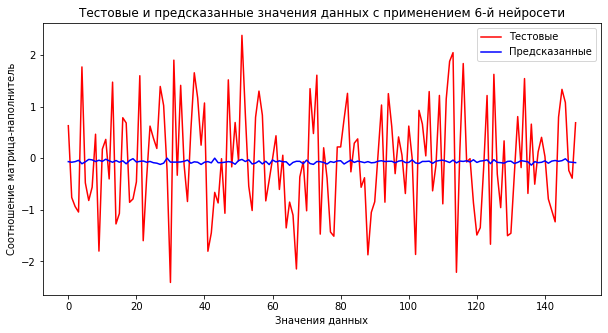

In [60]:
plt.figure(figsize=(10, 5))
plt.title('Тестовые и предсказанные значения данных с применением 6-й нейросети')
plt.plot(y_test.values, label='Тестовые', color='red')
plt.plot(y_pred6, label='Предсказанные', color='blue')
plt.xlabel('Значения данных')
plt.ylabel('Соотношение матрица-наполнитель')
plt.legend()
plt.show()

Создадим 7-ю нейронную сеть.

In [61]:
model7 = Sequential()
model7.add(Input(shape=X_train.shape[1]))
model7.add(Dense(128, activation='sigmoid'))
model7.add(Dense(64, activation='sigmoid'))
model7.add(Dense(32, activation='sigmoid'))
model7.add(Dense(16, activation='sigmoid'))
model7.add(Dense(8, activation='sigmoid'))
model7.add(Dense(1, activation='linear'))
#выведем полученную модель на экран
model7.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_24 (Dense)            (None, 128)               1664      
                                                                 
 dense_25 (Dense)            (None, 64)                8256      
                                                                 
 dense_26 (Dense)            (None, 32)                2080      
                                                                 
 dense_27 (Dense)            (None, 16)                528       
                                                                 
 dense_28 (Dense)            (None, 8)                 136       
                                                                 
 dense_29 (Dense)            (None, 1)                 9         
                                                                 
Total params: 12,673
Trainable params: 12,673
Non-trai

In [62]:
model7.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_squared_error'])

In [63]:
#функция ранней остановки, patience=5 - если в течение 5-ти эпох потери на валидации (val_loss) не будут уменьшаться
stop7 = tf.keras.callbacks.EarlyStopping(monitor='val_loss', verbose=1, patience=5)

In [64]:
history7_train = model7.fit(X_train, y_train,
                            batch_size=70,
                            epochs=30,
                            verbose=1,
                            callbacks=[stop7],
                            validation_data=(X_val, y_val))

Epoch 1/30
11/11 [==============================] - 2s 30ms/step - loss: 1.0264 - mean_squared_error: 1.6047 - val_loss: 0.8985 - val_mean_squared_error: 1.2987
Epoch 2/30
11/11 [==============================] - 0s 9ms/step - loss: 0.9177 - mean_squared_error: 1.3203 - val_loss: 0.8250 - val_mean_squared_error: 1.0967
Epoch 3/30
11/11 [==============================] - 0s 8ms/step - loss: 0.8547 - mean_squared_error: 1.1611 - val_loss: 0.7818 - val_mean_squared_error: 0.9801
Epoch 4/30
11/11 [==============================] - 0s 10ms/step - loss: 0.8187 - mean_squared_error: 1.0705 - val_loss: 0.7615 - val_mean_squared_error: 0.9252
Epoch 5/30
11/11 [==============================] - 0s 6ms/step - loss: 0.8048 - mean_squared_error: 1.0323 - val_loss: 0.7516 - val_mean_squared_error: 0.9017
Epoch 6/30
11/11 [==============================] - 0s 7ms/step - loss: 0.7983 - mean_squared_error: 1.0145 - val_loss: 0.7485 - val_mean_squared_error: 0.8952
Epoch 7/30
11/11 [====================

In [65]:
#качество модели на тестовой выборке
history7_test = model7.evaluate(X_test, y_test)

5/5 [==============================] - 0s 3ms/step - loss: 0.8474 - mean_squared_error: 1.0500


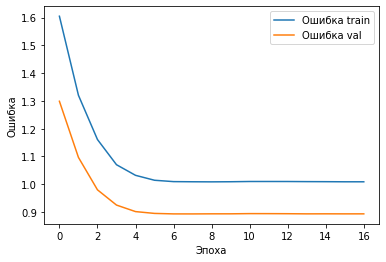

In [66]:
plt.plot(history7_train.history['mean_squared_error'], label='Ошибка train')
plt.plot(history7_train.history['val_mean_squared_error'], label='Ошибка val')
plt.xlabel('Эпоха')
plt.ylabel('Ошибка')
plt.legend()
plt.show()

In [67]:
#предсказываем результат для тестовой выборки
y_pred7 = model7.predict(X_test)

5/5 [==============================] - 0s 2ms/step


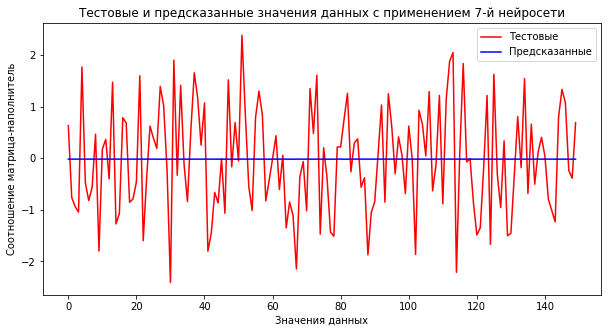

In [68]:
plt.figure(figsize=(10, 5))
plt.title('Тестовые и предсказанные значения данных с применением 7-й нейросети')
plt.plot(y_test.values, label='Тестовые', color='red')
plt.plot(y_pred7, label='Предсказанные', color='blue')
plt.xlabel('Значения данных')
plt.ylabel('Соотношение матрица-наполнитель')
plt.legend()
plt.show()

In [69]:
history_test = {
    'history1_test' : history1_test,
    'history2_test' : history2_test,
    'history3_test' : history3_test,
    'history4_test' : history4_test,
    'history5_test' : history5_test,
    'history6_test' : history6_test,
    'history7_test' : history7_test
}
history_test_df = pd.DataFrame(history_test)
history_test_df.T

,0,1
history1_test,0.848025,1.050867
history2_test,0.860793,1.068046
history3_test,0.905366,1.186593
history4_test,0.848025,1.050867
history5_test,0.919941,1.220210
history6_test,0.849433,1.052788
history7_test,0.847440,1.050008


In [70]:
r2_score_test = {
    'r2_score1' : r2_score(y_test, y_pred1),
    'r2_score2' : r2_score(y_test, y_pred2),
    'r2_score3' : r2_score(y_test, y_pred3),
    'r2_score4' : r2_score(y_test, y_pred4),
    'r2_score5' : r2_score(y_test, y_pred5),
    'r2_score6' : r2_score(y_test, y_pred6),
    'r2_score7' : r2_score(y_test, y_pred7)
}
r2_score_test
r2_score_test_df = pd.DataFrame([r2_score_test])
r2_score_test_df.T

,0
r2_score1,-0.001128
r2_score2,-0.017495
r2_score3,-0.130430
r2_score4,-0.001128
r2_score5,-0.162457
r2_score6,-0.002959
r2_score7,-0.000310


Сохраним модель.

In [71]:
pickle.dump(model7, open('model_neur_netw.pkl', 'wb'))

Keras weights file (<HDF5 file "variables.h5" (mode r+)>) saving:
...layers\dense
......vars
.........0
.........1
...layers\dense_1
......vars
.........0
.........1
...layers\dense_2
......vars
.........0
.........1
...layers\dense_3
......vars
.........0
.........1
...layers\dense_4
......vars
.........0
.........1
...layers\dense_5
......vars
.........0
.........1
...metrics\mean
......vars
.........0
.........1
...metrics\mean_metric_wrapper
......vars
.........0
.........1
...optimizer
......vars
.........0
.........1
.........10
.........11
.........12
.........13
.........14
.........15
.........16
.........17
.........18
.........19
.........2
.........20
.........21
.........22
.........23
.........24
.........3
.........4
.........5
.........6
.........7
.........8
.........9
...vars
Keras model archive saving:
File Name                                             Modified             Size
config.json                                    2023-03-23 15:57:24         3093
metadat

In [72]:
load_model_neur_netw = pickle.load(open('model_neur_netw.pkl', 'rb'))

Keras model archive loading:
File Name                                             Modified             Size
config.json                                    2023-03-23 15:57:24         3093
metadata.json                                  2023-03-23 15:57:24           64
variables.h5                                   2023-03-23 15:57:24       187216
Keras weights file (<HDF5 file "variables.h5" (mode r)>) loading:
...layers\dense
......vars
.........0
.........1
...layers\dense_1
......vars
.........0
.........1
...layers\dense_2
......vars
.........0
.........1
...layers\dense_3
......vars
.........0
.........1
...layers\dense_4
......vars
.........0
.........1
...layers\dense_5
......vars
.........0
.........1
...metrics\mean
......vars
.........0
.........1
...metrics\mean_metric_wrapper
......vars
.........0
.........1
...optimizer
......vars
.........0
.........1
.........10
.........11
.........12
.........13
.........14
.........15
.........16
.........17
.........18
.........19
..

In [73]:
load_model_neur_netw.predict(X_test)

5/5 [==============================] - 0s 2ms/step


array([[-0.01880505],
       [-0.01874698],
       [-0.01829284],
       [-0.01841731],
       [-0.01964711],
       [-0.01883104],
       [-0.01767174],
       [-0.01804603],
       [-0.01859211],
       [-0.01807492],
       [-0.01795917],
       [-0.01833615],
       [-0.01829878],
       [-0.01882961],
       [-0.0181656 ],
       [-0.01883406],
       [-0.01840939],
       [-0.01931319],
       [-0.01843216],
       [-0.01759169],
       [-0.01863382],
       [-0.01881377],
       [-0.01838865],
       [-0.0194849 ],
       [-0.0186327 ],
       [-0.01959186],
       [-0.01880168],
       [-0.01981268],
       [-0.01954211],
       [-0.01742668],
       [-0.01872257],
       [-0.01882682],
       [-0.01859801],
       [-0.01909765],
       [-0.01838285],
       [-0.01811898],
       [-0.01937946],
       [-0.01880703],
       [-0.01881481],
       [-0.01944236],
       [-0.01901799],
       [-0.01882026],
       [-0.01911401],
       [-0.0174822 ],
       [-0.01925554],
       [-0

In [74]:
y_pred7

array([[-0.01880505],
       [-0.01874698],
       [-0.01829284],
       [-0.01841731],
       [-0.01964711],
       [-0.01883104],
       [-0.01767174],
       [-0.01804603],
       [-0.01859211],
       [-0.01807492],
       [-0.01795917],
       [-0.01833615],
       [-0.01829878],
       [-0.01882961],
       [-0.0181656 ],
       [-0.01883406],
       [-0.01840939],
       [-0.01931319],
       [-0.01843216],
       [-0.01759169],
       [-0.01863382],
       [-0.01881377],
       [-0.01838865],
       [-0.0194849 ],
       [-0.0186327 ],
       [-0.01959186],
       [-0.01880168],
       [-0.01981268],
       [-0.01954211],
       [-0.01742668],
       [-0.01872257],
       [-0.01882682],
       [-0.01859801],
       [-0.01909765],
       [-0.01838285],
       [-0.01811898],
       [-0.01937946],
       [-0.01880703],
       [-0.01881481],
       [-0.01944236],
       [-0.01901799],
       [-0.01882026],
       [-0.01911401],
       [-0.0174822 ],
       [-0.01925554],
       [-0

In [75]:
model_neur_netw_sm1 = tf.keras.models.save_model(model7, 'G:\Файлы\Data Science\МГТУ им. Баумана\ВКР', overwrite=True,
                                                 include_optimizer=True, save_format=None, signatures=None, options=None)
#model_neur_netw_sm2 = model7.save('G:\Файлы\Data Science\МГТУ им. Баумана\ВКР')

INFO:tensorflow:Assets written to: G:\Файлы\Data Science\МГТУ им. Баумана\ВКР\assets


INFO:tensorflow:Assets written to: G:\Файлы\Data Science\МГТУ им. Баумана\ВКР\assets


In [76]:
loaded_model_neur_netw_sm1 = tf.keras.models.load_model('G:\Файлы\Data Science\МГТУ им. Баумана\ВКР',
                                                        custom_objects=None, compile=True, options=None)
#loaded_model_neur_netw_sm2 = tf.keras.models.load_model('G:\Файлы\Data Science\МГТУ им. Баумана\ВКР')

In [77]:
loaded_model_neur_netw_sm1.predict(X_test)
#loaded_model_neur_netw_sm2.predict(X_test)

5/5 [==============================] - 0s 2ms/step


array([[-0.01880505],
       [-0.01874698],
       [-0.01829284],
       [-0.01841731],
       [-0.01964711],
       [-0.01883104],
       [-0.01767174],
       [-0.01804603],
       [-0.01859211],
       [-0.01807492],
       [-0.01795917],
       [-0.01833615],
       [-0.01829878],
       [-0.01882961],
       [-0.0181656 ],
       [-0.01883406],
       [-0.01840939],
       [-0.01931319],
       [-0.01843216],
       [-0.01759169],
       [-0.01863382],
       [-0.01881377],
       [-0.01838865],
       [-0.0194849 ],
       [-0.0186327 ],
       [-0.01959186],
       [-0.01880168],
       [-0.01981268],
       [-0.01954211],
       [-0.01742668],
       [-0.01872257],
       [-0.01882682],
       [-0.01859801],
       [-0.01909765],
       [-0.01838285],
       [-0.01811898],
       [-0.01937946],
       [-0.01880703],
       [-0.01881481],
       [-0.01944236],
       [-0.01901799],
       [-0.01882026],
       [-0.01911401],
       [-0.0174822 ],
       [-0.01925554],
       [-0